<a href="https://colab.research.google.com/github/mofuoku417/Predict-Crude-Palm-Oil-Price-Holt-Winters-/blob/main/Crude_Palm_Oil_Price_Prediction_Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective

The objective of the Python notebook is to use Holt-winters method to predict monthly crude palm oil prices.

#### Data

Monthly crude palm oil prices were retrieved from index mundi:https://www.indexmundi.com/commodities/?commodity=palm-oil&months=300 for the periods 1984 and 2021

### Mount Google Drive to Google Colab Notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('/content/gdrive/MyDrive/Univariate Crude Palm Oil Price Prediction/Data/crude_palmoil_price.csv')
date_rng = pd.date_range(start='1990-05-01', end='2021-04-01', freq='M')
print(date_rng)


DatetimeIndex(['1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31', '1990-11-30', '1990-12-31',
               '1991-01-31', '1991-02-28',
               ...
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31'],
              dtype='datetime64[ns]', length=371, freq='M')


In [3]:
df.head()

,Month,cpo_pri
0,1990-05,281
1,1990-06,272
2,1990-07,279
3,1990-08,291
4,1990-09,284


#### Import the required libraries

#### Create time index

In [4]:
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
print(df.head())

     Month  cpo_pri  TimeIndex
0  1990-05      281 1990-05-31
1  1990-06      272 1990-06-30
2  1990-07      279 1990-07-31
3  1990-08      291 1990-08-31
4  1990-09      284 1990-09-30


In [5]:
df.set_index('Month')

,cpo_pri,TimeIndex
Month,,
1990-05,281,1990-05-31
1990-06,272,1990-06-30
1990-07,279,1990-07-31
1990-08,291,1990-08-31
1990-09,284,1990-09-30
...,...,...
2021-12,764,2019-12-31
2021-01,810,2020-01-31
2021-02,729,2020-02-29


#### Plot time series data

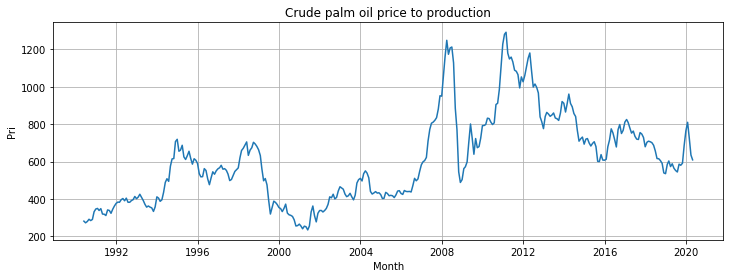

In [7]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(df.TimeIndex, df.cpo_pri)
plt.title('Crude palm oil price to production')
plt.ylabel('Pri')
plt.xlabel('Month')
plt.show()

#### Outlier detection

##### Box plot and interquartile range

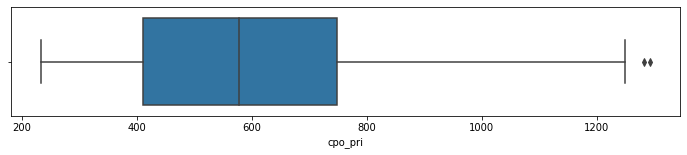

In [8]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=df['cpo_pri'],whis=1.5)

##### Histogram of cpo_pri

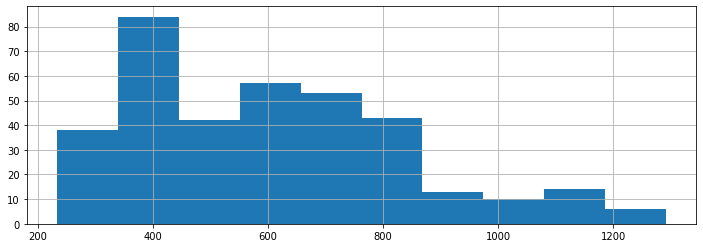

In [9]:
fig = df.cpo_pri.hist(figsize = (12,4))

#### Time series Decomposition

##### Additive seasonal decomposition

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


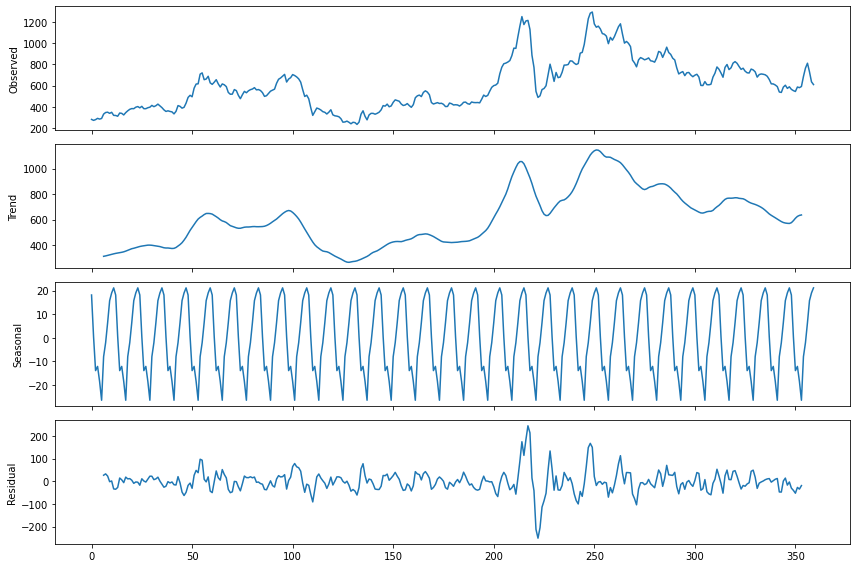

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.cpo_pri, model='additive', freq=12) # additive seasonal index
fig = decomposition.plot()
plt.show()

##### Multiplicative seasonal decomposition

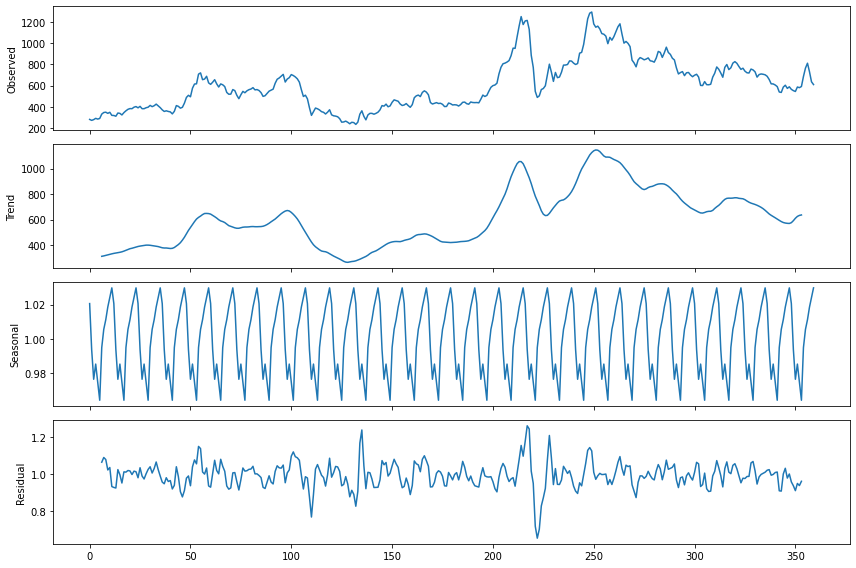

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df.cpo_pri, model='multiplicative', freq=12) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

#### Build and evaluate time series forecast

##### Split time series data into training and test set

In [11]:
train_len = 336
train = df[0:train_len] # first 120 months as training set
test = df[train_len:] # last 24 months as out-of-time test set

#### Naive method

In [12]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['cpo_pri'][train_len-1]

##### Plot train, test and forecast

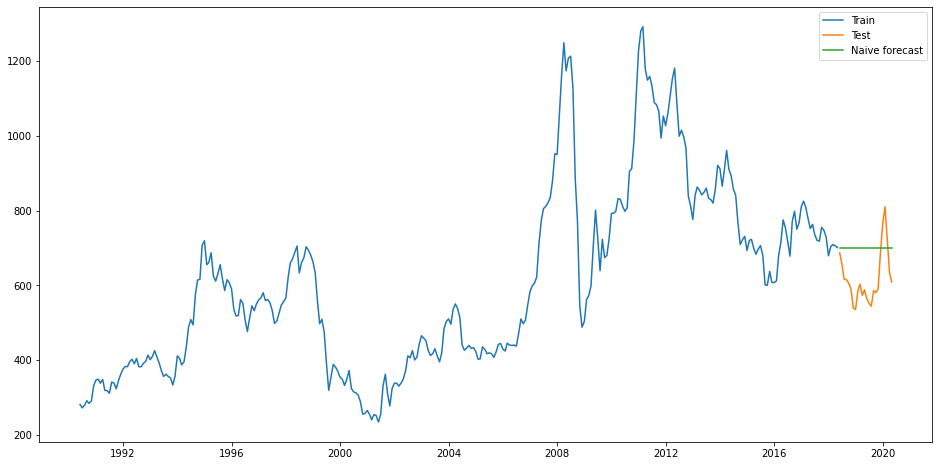

In [13]:
plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['cpo_pri'], label = 'Train')
plt.plot(test.TimeIndex, test['cpo_pri'],  label = 'Test')
plt.plot(test.TimeIndex, y_hat_naive['naive_forecast'],           label = 'Naive forecast')
#plt.title('Simple Exponential Smoothing with alpha ' + str(0.5))
plt.legend(loc='best') 
plt.show()


##### Compute the RMSE and MAPE

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['cpo_pri'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cpo_pri']-y_hat_naive['naive_forecast'])/test['cpo_pri'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,107.93,16.77


#### Simple average method

In [15]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['cpo_pri'].mean()

##### Plot train, test and forecast

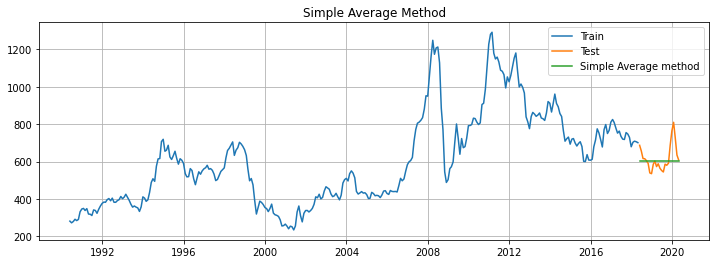

In [16]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train.TimeIndex, train.cpo_pri, label = 'Train')
plt.plot(test.TimeIndex, test.cpo_pri,  label = 'Test')
#plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.plot(test.TimeIndex, y_hat_avg['avg_forecast'],label = 'Simple Average method')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.title('Simple Average Method')
plt.show()

##### Compute the RMSE and MAPE

In [17]:
rmse = np.sqrt(mean_squared_error(test['cpo_pri'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cpo_pri']-y_hat_avg['avg_forecast'])/test['cpo_pri'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,107.93,16.77
0,Simple average method,70.71,7.58


#### Simple moving average method

In [18]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['cpo_pri'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##### Plot train, test and forecast

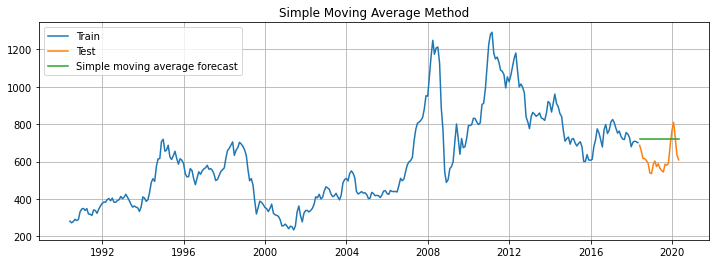

In [19]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train.TimeIndex, train.cpo_pri, label = 'Train')
plt.plot(test.TimeIndex, test.cpo_pri,  label = 'Test')
#plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.plot(test.TimeIndex, y_hat_sma['sma_forecast'][train_len:],label = 'Simple moving average forecast')
plt.legend(loc = 'best')
#plt.title('Original data after split')
plt.title('Simple Moving Average Method')
plt.show()


##### Compute the RMSE and MAPE

In [20]:
rmse = np.sqrt(mean_squared_error(test['cpo_pri'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['cpo_pri']-y_hat_sma['sma_forecast'][train_len:])/test['cpo_pri'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,107.93,16.77
0,Simple average method,70.71,7.58
0,Simple moving average forecast,124.81,19.53


#### Exponential smoothing methods

##### Simple exponential smoothing

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['cpo_pri'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

##### Plot train, test and forecast

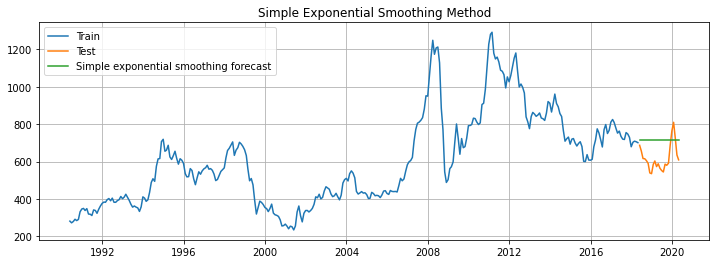

In [22]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train.TimeIndex, train.cpo_pri, label = 'Train')
plt.plot(test.TimeIndex, test.cpo_pri,  label = 'Test')
plt.plot(test.TimeIndex, y_hat_ses['ses_forecast'],label = 'Simple exponential smoothing forecast')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

##### Calculate RMSE and MAPE

In [23]:
rmse = np.sqrt(mean_squared_error(test['cpo_pri'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cpo_pri']-y_hat_ses['ses_forecast'])/test['cpo_pri'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,107.93,16.77
0,Simple average method,70.71,7.58
0,Simple moving average forecast,124.81,19.53
0,Simple exponential smoothing forecast,119.39,18.67


#### Holt's method with trend

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['cpo_pri']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 281.0, 'initial_slope': -9.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


##### Plot train, test and forecast

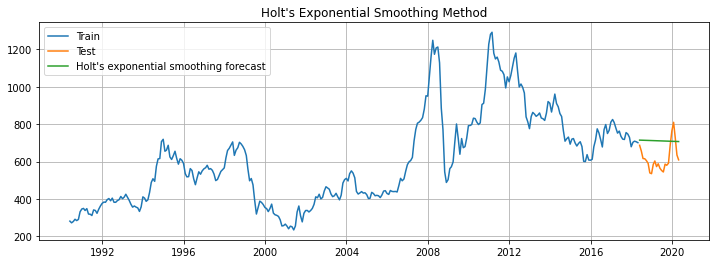

In [25]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train.TimeIndex, train.cpo_pri, label = 'Train')
plt.plot(test.TimeIndex, test.cpo_pri,  label = 'Test')
plt.plot(test.TimeIndex, y_hat_holt['holt_forecast'],label = 'Holt\'s exponential smoothing forecast')
plt.legend(loc = 'best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()


##### Compute RSME and MAPE

In [26]:
rmse = np.sqrt(mean_squared_error(test['cpo_pri'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cpo_pri']-y_hat_holt['holt_forecast'])/test['cpo_pri'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,107.93,16.77
0,Simple average method,70.71,7.58
0,Simple moving average forecast,124.81,19.53
0,Simple exponential smoothing forecast,119.39,18.67
0,Holt's exponential smoothing method,116.08,18.16


#### Holt Winters' additive method with trend and seasonality

In [27]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['cpo_pri']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.9473684187240107, 'smoothing_slope': 0.05066708334601075, 'smoothing_seasonal': 0.05263157661874757, 'damping_slope': nan, 'initial_level': 613.6399096995923, 'initial_slope': 3.670196849876655, 'initial_seasons': array([-295.53494778, -323.27297093, -338.36769999, -331.27870195,
       -327.12096806, -326.01198187, -302.8713954 , -283.78121123,
       -277.63524997, -278.00502947, -292.02948422, -291.86763997]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


##### Plot train, test and forecast

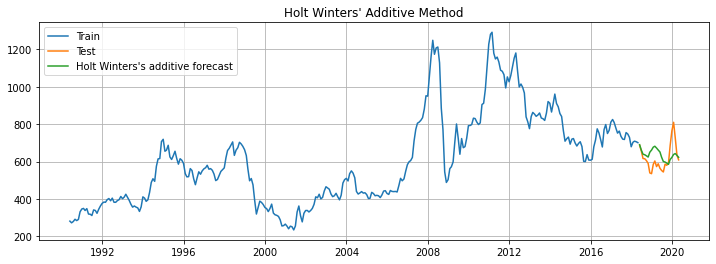

In [28]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train.TimeIndex, train.cpo_pri, label = 'Train')
plt.plot(test.TimeIndex, test.cpo_pri,  label = 'Test')
plt.plot(test.TimeIndex, y_hat_hwa['hw_forecast'],label = 'Holt Winters\'s additive forecast')
plt.legend(loc = 'best')
plt.title('Holt Winters\' Additive Method')
plt.show()

##### Compute the RMSE and MAPE

In [29]:
rmse = np.sqrt(mean_squared_error(test['cpo_pri'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cpo_pri']-y_hat_hwa['hw_forecast'])/test['cpo_pri'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,107.93,16.77
0,Simple average method,70.71,7.58
0,Simple moving average forecast,124.81,19.53
0,Simple exponential smoothing forecast,119.39,18.67
0,Holt's exponential smoothing method,116.08,18.16
0,Holt Winters' additive method,76.35,9.57


#### Holt Winter's multiplicative method with trend and seasonality

In [30]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['cpo_pri']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.8421072623452256, 'smoothing_slope': 0.05263087529909859, 'smoothing_seasonal': 0.15789263551276753, 'damping_slope': nan, 'initial_level': 616.106727913611, 'initial_slope': 3.8125882540542313, 'initial_seasons': array([0.46870509, 0.4334517 , 0.42328453, 0.43818198, 0.44738979,
       0.44623826, 0.47357262, 0.48844863, 0.48513255, 0.48377309,
       0.4916896 , 0.48815482]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


##### Plot train, test and forecast

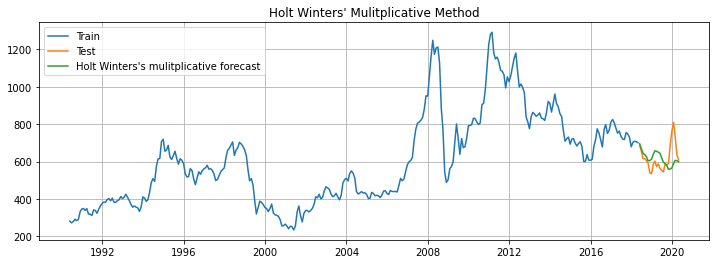

In [31]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train.TimeIndex, train.cpo_pri, label = 'Train')
plt.plot(test.TimeIndex, test.cpo_pri,  label = 'Test')
plt.plot(test.TimeIndex, y_hat_hwm['hw_forecast'],label = 'Holt Winters\'s mulitplicative forecast')
plt.legend(loc = 'best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

##### Compute RMSE and MAPE

In [32]:
rmse = np.sqrt(mean_squared_error(test['cpo_pri'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cpo_pri']-y_hat_hwm['hw_forecast'])/test['cpo_pri'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,107.93,16.77
0,Simple average method,70.71,7.58
0,Simple moving average forecast,124.81,19.53
0,Simple exponential smoothing forecast,119.39,18.67
0,Holt's exponential smoothing method,116.08,18.16
0,Holt Winters' additive method,76.35,9.57
0,Holt Winters' multiplicative method,82.52,9.35


#### Inference
Overall the best model is the Holt Winters' additive method